In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
# 实际的线
TRUE_W = 3.0
TRUE_B = 2.0

NUM_EXAMPLES = 1000

# 随机向量x
x = tf.random.normal(shape=[NUM_EXAMPLES])

# 生成噪声
noise = tf.random.normal(shape=[NUM_EXAMPLES])

# 计算y
y = x * TRUE_W + TRUE_B + noise


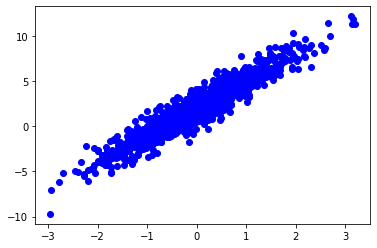

In [3]:
import matplotlib.pyplot as plt

plt.scatter(x, y, c="b")
plt.show()

In [4]:
class CustomModel(keras.Model):
    def train_step(self, data):
        # Unpack the data. Its structure depends on your model and
        # on what you pass to `fit()`.
        x, y = data

        with tf.GradientTape() as tape:
            y_pred = self(x, training=True)  # Forward pass
            # Compute the loss value
            # (the loss function is configured in `compile()`)
            loss = self.compiled_loss(y, y_pred, regularization_losses=self.losses)

        # Compute gradients
        trainable_vars = self.trainable_variables
        gradients = tape.gradient(loss, trainable_vars)
        # Update weights
        self.optimizer.apply_gradients(zip(gradients, trainable_vars))
        # Update metrics (includes the metric that tracks the loss)
        self.compiled_metrics.update_state(y, y_pred)
        # Return a dict mapping metric names to current value
        return {m.name: m.result() for m in self.metrics}


import numpy as np

# Construct and compile an instance of CustomModel
inputs = keras.Input(shape=(32,))
outputs = keras.layers.Dense(1)(inputs)
model = CustomModel(inputs, outputs)
model.compile(optimizer="adam", loss="mse", metrics=["mae"])

# Just use `fit` as usual
x = np.random.random((1000, 32))
y = np.random.random((1000, 1))
model.fit(x, y, epochs=3)

Epoch 1/3
32/32 [==============================] - 1s 3ms/step - loss: 0.2079 - mae: 0.3681
Epoch 2/3
32/32 [==============================] - 0s 4ms/step - loss: 0.1936 - mae: 0.3487
Epoch 3/3
32/32 [==============================] - 0s 3ms/step - loss: 0.1934 - mae: 0.3567


In [5]:
# Define Sequential model with 3 layers
model = keras.Sequential(
    [
        layers.Dense(2, activation="relu", name="layer1"),
        layers.Dense(3, activation="relu", name="layer2"),
        layers.Dense(4, name="layer3"),
    ]
)
# Call model on a test input
x = tf.ones((3, 3))
y = model(x)
y

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[-0.21265732,  1.4681922 ,  1.3959696 , -0.780908  ],
       [-0.21265732,  1.4681922 ,  1.3959696 , -0.780908  ],
       [-0.21265732,  1.4681922 ,  1.3959696 , -0.780908  ]],
      dtype=float32)>

In [6]:
# Create 3 layers
layer1 = layers.Dense(2, activation="relu", name="layer1")
layer2 = layers.Dense(3, activation="relu", name="layer2")
layer3 = layers.Dense(4, name="layer3")

# Call layers on a test input
x = tf.ones((3, 3))
y = layer3(layer2(layer1(x)))
y

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)>

In [7]:
model = keras.Sequential(
    [
        layers.Dense(2, activation="relu"),
        layers.Dense(3, activation="relu"),
        layers.Dense(4),
    ]
)

In [8]:
model = keras.Sequential()
model.add(layers.Dense(2, activation="relu"))
model.add(layers.Dense(3, activation="relu"))
model.add(layers.Dense(4))

In [9]:
model = keras.Sequential(name="my_sequential")
model.add(layers.Dense(2, activation="relu", name="layer1"))
model.add(layers.Dense(3, activation="relu", name="layer2"))
model.add(layers.Dense(4, name="layer3"))

In [10]:
layer = layers.Dense(3)
layer.weights  # Empty

[]

In [11]:
# Call layer on a test input
x = tf.ones((1, 4))
y = layer(x)
layer.weights  # Now it has weights, of shape (4, 3) and (3,)

[<tf.Variable 'dense_7/kernel:0' shape=(4, 3) dtype=float32, numpy=
 array([[-0.87336516, -0.34015906, -0.7433777 ],
        [ 0.65673065, -0.2353059 ,  0.3450576 ],
        [ 0.8730222 , -0.6765791 ,  0.7184082 ],
        [-0.61522204, -0.19517785,  0.41657734]], dtype=float32)>,
 <tf.Variable 'dense_7/bias:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>]

In [12]:
model = keras.Sequential(
    [
        layers.Dense(2, activation="relu"),
        layers.Dense(3, activation="relu"),
        layers.Dense(4),
    ]
)  # No weights at this stage!

# At this point, you can't do this:
# model.weights

# You also can't do this:
# model.summary()

# Call the model on a test input
x = tf.ones((1, 4))
y = model(x)
print("Number of weights after calling the model:", len(model.weights))  # 6

Number of weights after calling the model: 6


In [13]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (1, 2)                    10        
_________________________________________________________________
dense_9 (Dense)              (1, 3)                    9         
_________________________________________________________________
dense_10 (Dense)             (1, 4)                    16        
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


# 使用内置方法进行训练和评估

In [14]:
inputs = keras.Input(shape=(784,), name="digits")
x = layers.Dense(64, activation="relu", name="dense_1")(inputs)
x = layers.Dense(64, activation="relu", name="dense_2")(x)
outputs = layers.Dense(10, activation="softmax", name="predictions")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [15]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Preprocess the data (these are NumPy arrays)
x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

# Reserve 10,000 samples for validation
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

In [16]:
model.compile(
    optimizer=keras.optimizers.RMSprop(),  # Optimizer
    # Loss function to minimize
    loss=keras.losses.SparseCategoricalCrossentropy(),
    # List of metrics to monitor
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)

In [17]:
print("Fit model on training data")
history = model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=2,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    validation_data=(x_val, y_val),
)

Fit model on training data
Epoch 1/2
782/782 [==============================] - 4s 5ms/step - loss: 0.5920 - sparse_categorical_accuracy: 0.8343 - val_loss: 0.1899 - val_sparse_categorical_accuracy: 0.9458
Epoch 2/2
782/782 [==============================] - 4s 5ms/step - loss: 0.1785 - sparse_categorical_accuracy: 0.9482 - val_loss: 0.1419 - val_sparse_categorical_accuracy: 0.9611


In [18]:
history.history

{'loss': [0.3568549156188965, 0.16724228858947754],
 'sparse_categorical_accuracy': [0.8980799913406372, 0.9509599804878235],
 'val_loss': [0.1898895502090454, 0.14190366864204407],
 'val_sparse_categorical_accuracy': [0.9458000063896179, 0.9610999822616577]}

## 为方便以后重用，我们将模型定义和编译步骤放入函数中；我们将在本指南的不同示例中多次调用它们。

In [19]:
def get_uncompiled_model():
    inputs = keras.Input(shape=(784,), name="digits")
    x = layers.Dense(64, activation="relu", name="dense_1")(inputs)
    x = layers.Dense(64, activation="relu", name="dense_2")(x)
    outputs = layers.Dense(10, activation="softmax", name="predictions")(x)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model


def get_compiled_model():
    model = get_uncompiled_model()
    model.compile(
        optimizer="rmsprop",
        loss="sparse_categorical_crossentropy",
        metrics=["sparse_categorical_accuracy"],
    )
    return model

##  仅在使用 NumPy 数据进行训练时才能使用 validation_split

In [20]:
model.fit(x_train, y_train, batch_size=64, validation_split=0.2, epochs=1)


625/625 [==============================] - 3s 5ms/step - loss: 0.1187 - sparse_categorical_accuracy: 0.9650 - val_loss: 0.1313 - val_sparse_categorical_accuracy: 0.9600


## tf.data 数据集进行训练和评估

In [21]:
model = get_compiled_model()

# First, let's create a training Dataset instance.
# For the sake of our example, we'll use the same MNIST data as before.
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
# Shuffle and slice the dataset.
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(64)

# Now we get a test dataset.
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_dataset = test_dataset.batch(64)

# Since the dataset already takes care of batching,
# we don't pass a `batch_size` argument.
model.fit(train_dataset, epochs=3)

# You can also evaluate or predict on a dataset.
print("Evaluate")
result = model.evaluate(test_dataset)
dict(zip(model.metrics_names, result))

# 请注意，数据集会在每个周期结束时重置，因此可以在下一个周期重复使用。

Epoch 1/3
782/782 [==============================] - 4s 4ms/step - loss: 0.5482 - sparse_categorical_accuracy: 0.8518
Epoch 2/3
782/782 [==============================] - 4s 4ms/step - loss: 0.1745 - sparse_categorical_accuracy: 0.9483
Epoch 3/3
782/782 [==============================] - 4s 5ms/step - loss: 0.1270 - sparse_categorical_accuracy: 0.9633
Evaluate
157/157 [==============================] - 1s 3ms/step - loss: 0.1429 - sparse_categorical_accuracy: 0.9536


{'loss': 0.14289292693138123,
 'sparse_categorical_accuracy': 0.9535999894142151}

## steps_per_epoch 

## 请注意，数据集会在每个周期结束时重置，因此可以在下一个周期重复使用。

In [31]:
model = get_compiled_model()

# Prepare the training dataset
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(64)

# Only use the 100 batches per epoch (that's 64 * 100 samples)
model.fit(train_dataset, epochs=10, steps_per_epoch=100)
'''
如果您只想在来自此数据集的特定数量批次上进行训练，则可以传递 steps_per_epoch 参数，此参数可以指定在继续下一个周期之前，模型应使用此数据集运行多少训练步骤。

如果执行此操作，则不会在每个周期结束时重置数据集，而是会继续绘制接下来的批次。数据集最终将用尽数据（除非它是无限循环的数据集）。
'''

Epoch 1/10
100/100 [==============================] - 1s 5ms/step - loss: 1.1881 - sparse_categorical_accuracy: 0.6777
Epoch 2/10
100/100 [==============================] - 1s 7ms/step - loss: 0.3868 - sparse_categorical_accuracy: 0.8914
Epoch 3/10
100/100 [==============================] - 1s 5ms/step - loss: 0.3523 - sparse_categorical_accuracy: 0.8935
Epoch 4/10
100/100 [==============================] - 0s 5ms/step - loss: 0.2667 - sparse_categorical_accuracy: 0.9222
Epoch 5/10
100/100 [==============================] - 1s 5ms/step - loss: 0.2487 - sparse_categorical_accuracy: 0.9261
Epoch 6/10
100/100 [==============================] - 1s 5ms/step - loss: 0.2273 - sparse_categorical_accuracy: 0.9290
Epoch 7/10
100/100 [==============================] - 0s 5ms/step - loss: 0.2341 - sparse_categorical_accuracy: 0.9274
Epoch 8/10
100/100 [==============================] - 0s 4ms/step - loss: 0.2241 - sparse_categorical_accuracy: 0.9334


'\n如果您只想在来自此数据集的特定数量批次上进行训练，则可以传递 steps_per_epoch 参数，此参数可以指定在继续下一个周期之前，模型应使用此数据集运行多少训练步骤。\n\n如果执行此操作，则不会在每个周期结束时重置数据集，而是会继续绘制接下来的批次。数据集最终将用尽数据（除非它是无限循环的数据集）。\n'

## 使用验证数据集
可以在 fit() 中将 Dataset 实例作为 validation_data 参数传递：

In [32]:
model = get_compiled_model()

# Prepare the training dataset
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(64)

# Prepare the validation dataset
val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
val_dataset = val_dataset.batch(64)

model.fit(train_dataset, epochs=1, validation_data=val_dataset)

782/782 [==============================] - 5s 6ms/step - loss: 0.5717 - sparse_categorical_accuracy: 0.8433 - val_loss: 0.1775 - val_sparse_categorical_accuracy: 0.9528


在每个周期结束时，模型将迭代验证数据集并计算验证损失和验证指标。

如果只想对此数据集中的特定数量批次运行验证，则可以传递 **validation_steps 参数**，此参数可以指定在中断验证并进入下一个周期之前，模型应使用验证数据集运行多少验证步骤：


In [28]:
''' 如果只想对此数据集中的特定数量批次运行验证，则可以传递 validation_steps 参数，
此参数可以指定在中断验证并进入下一个周期之前，模型应使用验证数据集运行多少验证步骤：
'''
model = get_compiled_model()

# Prepare the training dataset
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(64)

# Prepare the validation dataset
val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
val_dataset = val_dataset.batch(64)

model.fit(
    train_dataset,
    epochs=1,
    # Only run validation using the first 10 batches of the dataset
    # using the `validation_steps` argument
    validation_data=val_dataset,
    validation_steps=10,
)



782/782 [==============================] - 5s 5ms/step - loss: 0.5540 - sparse_categorical_accuracy: 0.8478 - val_loss: 0.2873 - val_sparse_categorical_accuracy: 0.9266
